<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Sistema_Llenado_Cocoas_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breve Explicacion
Los datos que se utilizaran,fueron extraidos de un sistema de llenado de cocoa,se quiere entender y/o aproximar el comportamiento del sistema de llenado que consta de un servormotor enlazado mecanicamente a un suministrador de granos, una balanza de presicion y otros accesorios,por cada vuelta del servomotor se llena un paquete de cocoa,el sistema a sufrido algunas modificaciones y por ende a perdido la exactitud al momento de llenar los paquetes con los nuevos pesos.
El objetivo es encontrar un patron de pesos y mas adelante aplicar un sistema de control de pesos

# 1. Importando las librerias necesarias 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Leer la data 

In [ ]:
df_Linea1_prom=pd.read_csv('Linea1_Promedio.csv',delimiter=';')
df_Linea1_prom.head()

,DATO1,DATO2,DATO3,DATO4,DATO5,DATO6
0,11/24/2020,11:31:16,361,[MAINAR3]PROM_PESO_PV_1 ...,125.40,1
1,11/24/2020,11:31:29,414,[MAINAR3]PROM_PESO_PV_1 ...,125.25,2
2,11/24/2020,11:32:31,253,[MAINAR3]PROM_PESO_PV_1 ...,125.14,3
3,11/24/2020,11:33:35,135,[MAINAR3]PROM_PESO_PV_1 ...,126.38,4
4,11/24/2020,11:34:35,960,[MAINAR3]PROM_PESO_PV_1 ...,126.90,5


# 3. Graficar los pesos de cocoa con respecto al tiempo de muestreo

<function matplotlib.pyplot.show>

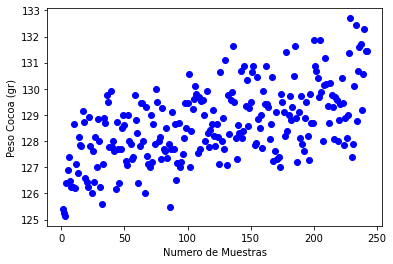

In [ ]:
plt.scatter(df_Linea1_prom.DATO6, df_Linea1_prom.DATO5, color ='blue')
plt.xlabel("Numero de Muestras")
plt.ylabel("Peso Cocoa (gr)")
plt.show

# 4. Creando un conjunto de train y test

In [ ]:
msk = np.random.rand(len(df_Linea1_prom))<0.8
train = df_Linea1_prom[msk]
test = df_Linea1_prom[~msk]

# 5. Regresión Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x =np.asanyarray(train[['DATO6']])
train_y = np.asanyarray(train[['DATO5']])

test_x = np.asanyarray(test[['DATO6']])
test_y = np.asanyarray(test[['DATO5']])
Grado=5
poly = PolynomialFeatures(degree=Grado)
train_x_poly = poly.fit_transform(train_x)
train_x_poly 

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       ...,
       [1.00000000e+00, 2.38000000e+02, 5.66440000e+04, 1.34812720e+07,
        3.20854274e+09, 7.63633171e+11],
       [1.00000000e+00, 2.39000000e+02, 5.71210000e+04, 1.36519190e+07,
        3.26280864e+09, 7.79811265e+11],
       [1.00000000e+00, 2.42000000e+02, 5.85640000e+04, 1.41724880e+07,
        3.42974210e+09, 8.29997587e+11]])

In [ ]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.21511411e-01 -2.59761302e-03  2.62704822e-05
  -1.19038034e-07  1.97297984e-10]]
Intercept:  [125.86331192]


Text(0, 0.5, 'Peso Cocoa (gr)')

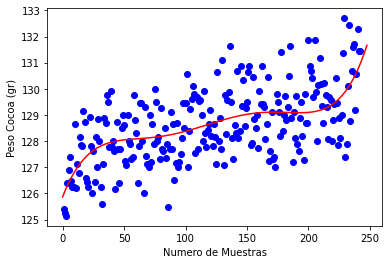

In [ ]:
plt.scatter(df_Linea1_prom.DATO6, df_Linea1_prom.DATO5,  color='blue')
XX = np.arange(0.0, 250.0, 2.5)

#yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

for i in np.arange(0,(clf.coef_).shape[1]):
    
    if(i==0):
        yy=clf.intercept_[0]
    else:
        yy=yy+clf.coef_[0][i]*np.power(XX, i)


plt.plot(XX, yy, '-r' )
plt.xlabel("Numero de Muestras")
plt.ylabel("Peso Cocoa (gr)")

# 6.Evaluación

In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1.05
Residual sum of squares (MSE): 1.77
R2-score: -1.11


# 7.Conclusion

Despues de realizar varios intentos para tener una mayor aproximacion de la curva a los datos reales
para un n=5 (grado 5),se obtiene una buena aproximacion.
se puede observar que La data muestral fue muy poca para tener una mayor aproximacion al comportamiento del
sistema de llenado de cocoas.
se pretende realizar un mayor numero de muestras dependiendo de la disponiblidad del cliente.